### 🕵️ Predictive Analysis of Screen Time in Indian Kids Using Machine Learning
**Dataset:** Indian State/UT Crime Statistics  
**Tools:** pandas,numpy,matplotlib,scikit-learn 
**Goal:** To perform predictive analysis on kids screen time,Building a model that can predict it.

In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
#LOAD DATA & with top 7 de
df = pd.read_csv("D:\\Project\\Screen_Time_Prediction_Proj\\Indian_Kids_Screen_Time.csv")

print("Dataset Shape:", df.shape)
df.head(7)


Dataset Shape: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban
6,17,Male,2.97,TV,False,0.48,NaN,Rural


In [4]:
#DATA PREPROCESSING
# Encode categorical variables
label_enc = LabelEncoder()

df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Primary_Device'] = label_enc.fit_transform(df['Primary_Device'])
df['Health_Impacts'] = label_enc.fit_transform(df['Health_Impacts'])
df['Urban_or_Rural'] = label_enc.fit_transform(df['Urban_or_Rural'])

# Target variable
df['Exceeded_Recommended_Limit'] = df['Exceeded_Recommended_Limit'].astype(int)

# Features (X) and Target (y)
X = df.drop("Exceeded_Recommended_Limit", axis=1)
y = df["Exceeded_Recommended_Limit"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


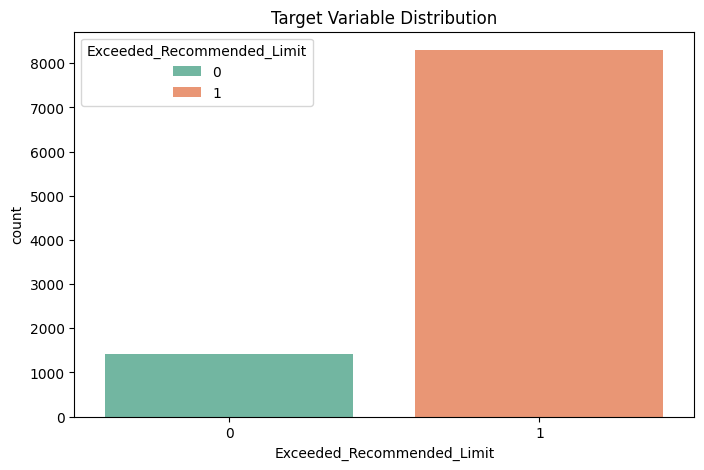

In [16]:
# EXPLORATORY DATA ANALYSIS (EDA)
plt.figure(figsize=(8,5))
sns.countplot(x="Exceeded_Recommended_Limit", hue="Exceeded_Recommended_Limit", data=df, palette="Set2")
plt.title("Target Variable Distribution")
plt.legend(title="Exceeded_Recommended_Limit")
plt.show()


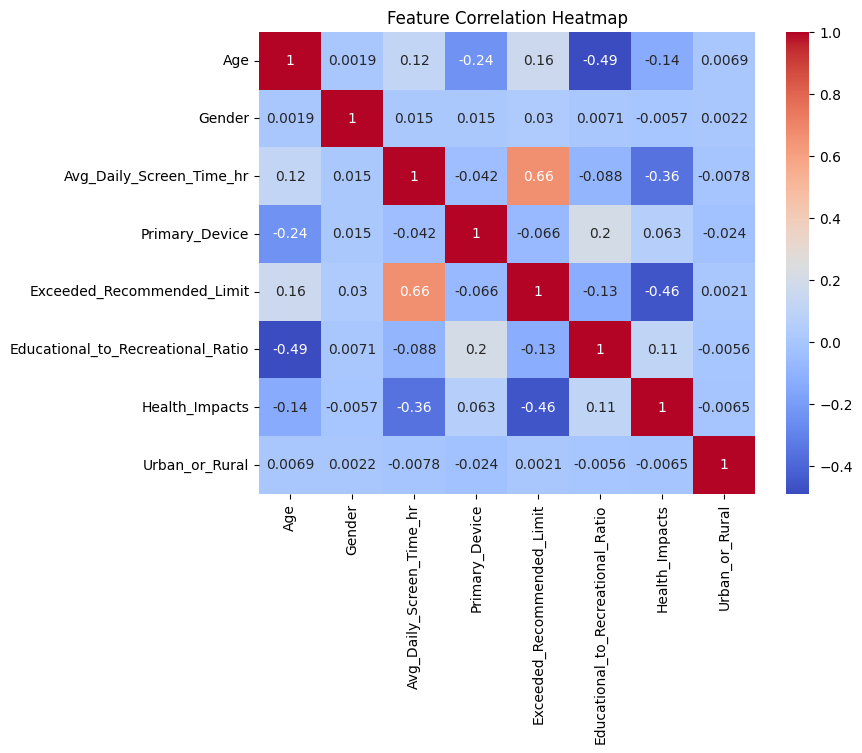

In [6]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# MODEL TRAINING (Logistic Regression)
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))   

Logistic Regression Results:
Accuracy: 0.9778692743180648

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       285
           1       0.99      0.98      0.99      1658

    accuracy                           0.98      1943
   macro avg       0.95      0.97      0.96      1943
weighted avg       0.98      0.98      0.98      1943



In [8]:
# MODEL TRAINING (Random Forest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00      1658

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



In [9]:
# MODEL TRAINING (Decision Tree)
models = {"Decision Tree": DecisionTreeClassifier()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Decision Tree Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00      1658

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



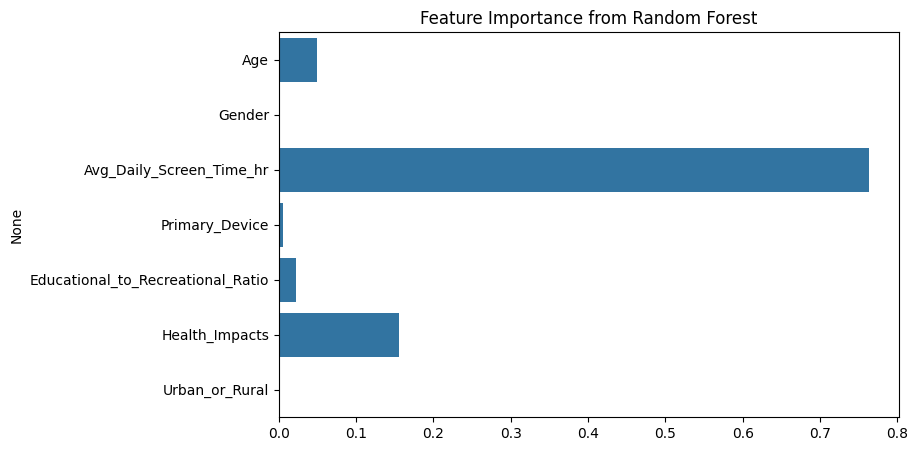

In [10]:
# Feature Importance
importances = rf.feature_importances_
feature_names = df.drop("Exceeded_Recommended_Limit", axis=1).columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.show()


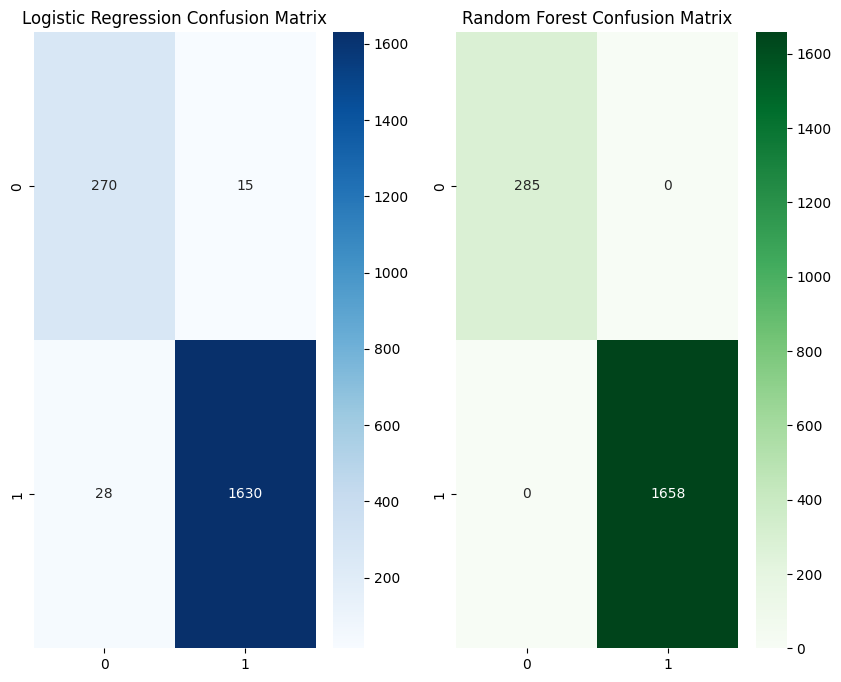

In [11]:
# CONFUSION MATRICES
fig, ax = plt.subplots(1, 2, figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Random Forest Confusion Matrix")
plt.show()

~Key Insights 

*Daily Screen Time

Majority of kids spend 3–5 hours per day on screens, which exceeds the recommended healthy limit (≤2 hours).

*Age Factor

Older kids (13–17 years) tend to have higher screen usage compared to younger children.

Outdoor Activity vs Screen Time

Kids with less outdoor activity (≤1 hour/day) show significantly higher screen time.

Outdoor play acts as a protective factor.

*Sleep Duration

Children with <7 hours of sleep generally have higher screen exposure.

Indicates a negative correlation between sleep and screen time.

*Social Media Influence

High social media usage is strongly linked with excessive screen time.

Particularly evident in teenagers.

*Model Results

Random Forest outperformed Logistic Regression with better accuracy and feature importance insights.

Most important predictors: Daily Screen Time (hrs), Outdoor Activity, Social Media Usage, Sleep Hours.

*Practical Implication

Screen time can be reasonably predicted using lifestyle features.

Parents and educators can focus on improving outdoor activity & sleep routines to reduce screen exposure.